# Intel Image Classification  


**A Comparative Study of Deep Learning Architectures for Image Classification on Intel Dataset and Comparing the Results for the Pretrained and Scratch Model**



In [ ]:
pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 8.8 MB/s eta 0:00:00


# Importing Necessary Libraries

In [ ]:
# Importing necessary libraries
import pandas as pd  # Pandas for data manipulation
import numpy as np   # NumPy for numerical operations
import matplotlib.pyplot as plt  # Matplotlib for plotting
import seaborn as sns  # Seaborn for statistical data visualization
sns.set(style="whitegrid")  # Set seaborn style to whitegrid for plots

# Operating System related functionality
import os

# OpenCV library for computer vision tasks
import cv2

# Glob module finds all the pathnames matching a specified pattern
from glob import glob

# Python Imaging Library for image processing tasks
from PIL import Image

# TensorFlow library for machine learning tasks
import tensorflow as tf

# Keras, a high-level neural networks API, running on top of TensorFlow
import keras

# Importing required modules from Keras
from keras.applications import VGG16
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

# TensorFlow-specific imports
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPool2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from tensorflow.keras.applications import VGG16


# Mounting Google Drive

In [ ]:
# Importing the drive module from google.colab
from google.colab import drive

# Mounting Google Drive onto the Colab environment
drive.mount('/content/drive')

Mounted at /content/drive


# Training,Testing,Prediction Paths

In [ ]:
# Path to the directory containing training data
train_path = '/content/drive/MyDrive/Archive (3)/seg_train/seg_train/'

# Path to the directory containing testing data
test_path = '/content/drive/MyDrive/Archive (3)/seg_test/seg_test/'

# Path to the directory containing prediction data
pred_path = '/content/drive/MyDrive/Archive (3)/seg_pred/seg_pred/'


# Check number of images in each class within the training directory

In [ ]:
# Check number of images in each class within the training directory
print("IN TRAIN : ")
for folder in os.listdir(train_path):
    # Find all files with the extension .jpg in each folder
    files = glob(pathname=str(train_path + folder + '/*.jpg'))
    # Print the number of files found in each folder
    print(f'Found {len(files)} in folder {folder}')

# Check number of images in each class within the testing directory
print("IN TEST : ")
for folder in os.listdir(test_path):
    # Find all files with the extension .jpg in each folder
    files = glob(pathname=str(test_path + folder + '/*.jpg'))
    # Print the number of files found in each folder
    print(f'Found {len(files)} in folder {folder}')


IN TRAIN : 
Found 2191 in folder buildings
Found 2512 in folder mountain
Found 2271 in folder forest
Found 2404 in folder glacier
Found 2382 in folder street
Found 2274 in folder sea
IN TEST : 
Found 501 in folder street
Found 510 in folder sea
Found 525 in folder mountain
Found 437 in folder buildings
Found 553 in folder glacier
Found 474 in folder forest


In [ ]:
# Find all files with the extension .jpg in the prediction directory
files = glob(pathname=str(pred_path + '*.jpg'))

# Print the total number of .jpg files found in the prediction directory
print(f'Found {len(files)}')


Found 265


_____

# Data preprocessing

In [ ]:
# Empty list to store image sizes
size = []

# Iterate through each folder (class) in the training directory
for folder in os.listdir(train_path):
    # Find all files with the extension .jpg in each folder
    files = glob(pathname=str(train_path + folder + '/*.jpg'))

    # Iterate through each image file in the folder
    for file in files:
        # Read the image using matplotlib's imread function
        image = plt.imread(file)
        # Append the shape (size) of the image to the size list
        size.append(image.shape)

# Convert the list of sizes into a Pandas Series and count the occurrences of each size
size_counts = pd.Series(size).value_counts()

# Print out the counts of different image sizes
print(size_counts)

(150, 150, 3)    13986
(113, 150, 3)        7
(135, 150, 3)        3
(111, 150, 3)        3
(146, 150, 3)        2
(134, 150, 3)        2
(144, 150, 3)        2
(136, 150, 3)        2
(123, 150, 3)        2
(142, 150, 3)        2
(143, 150, 3)        2
(108, 150, 3)        2
(81, 150, 3)         1
(141, 150, 3)        1
(124, 150, 3)        1
(100, 150, 3)        1
(145, 150, 3)        1
(147, 150, 3)        1
(103, 150, 3)        1
(133, 150, 3)        1
(131, 150, 3)        1
(115, 150, 3)        1
(120, 150, 3)        1
(110, 150, 3)        1
(97, 150, 3)         1
(119, 150, 3)        1
(149, 150, 3)        1
(76, 150, 3)         1
(105, 150, 3)        1
(102, 150, 3)        1
(140, 150, 3)        1
Name: count, dtype: int64


In [ ]:
# Empty list to store image sizes
size = []

# Iterate through each folder (class) in the testing directory
for folder in os.listdir(test_path):
    # Find all files with the extension .jpg in each folder
    files = glob(pathname=str(test_path + folder + '/*.jpg'))

    # Iterate through each image file in the folder
    for file in files:
        # Read the image using matplotlib's imread function
        image = plt.imread(file)
        # Append the shape (size) of the image to the size list
        size.append(image.shape)

# Convert the list of sizes into a Pandas Series and count the occurrences of each size
size_counts = pd.Series(size).value_counts()

# Print out the counts of different image sizes
print(size_counts)

(150, 150, 3)    2993
(131, 150, 3)       1
(81, 150, 3)        1
(110, 150, 3)       1
(149, 150, 3)       1
(72, 150, 3)        1
(76, 150, 3)        1
(141, 150, 3)       1
Name: count, dtype: int64


In [ ]:
# Empty list to store image sizes
size = []

# Find all files with the extension .jpg in the prediction directory
files = glob(pathname=str(pred_path + '*.jpg'))

# Iterate through each image file in the prediction directory
for file in files:
    # Read the image using matplotlib's imread function
    image = plt.imread(file)
    # Append the shape (size) of the image to the size list
    size.append(image.shape)

# Convert the list of sizes into a Pandas Series and count the occurrences of each size
size_counts = pd.Series(size).value_counts()

# Print out the counts of different image sizes
print(size_counts)

(150, 150, 3)    265
Name: count, dtype: int64


\Almost size of all images is `150,150,3`. So we will use this shape as a input shape to our model to overcome lossing information problem.

# Data Loaders using Generators , Data augmentation

In [ ]:
# Data augmentation configuration for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values to the range [0,1]
    zoom_range=0.25,  # Randomly zoom images by up to 25%
    validation_split=0.2,  # Split the data into 80% training and 20% validation
    width_shift_range=0.15,  # Randomly shift images horizontally by up to 15%
    height_shift_range=0.15,  # Randomly shift images vertically by up to 15%
    horizontal_flip=True,  # Randomly flip images horizontally
    vertical_flip=False,  # No vertical flipping
    fill_mode='nearest'  # Strategy for filling in newly created pixels
)

# Generate the train generators with 80% of samples from train_Set
train_generator = train_datagen.flow_from_directory(
    train_path,  # Path to the training data directory
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=128,  # Number of samples per batch
    subset='training',  # Specify subset as training data
    shuffle=True,  # Shuffle the data
    class_mode="categorical"  # Use categorical labels
)

# Generate the validation generators with 20% of samples from train_Set
val_generator = train_datagen.flow_from_directory(
    train_path,  # Path to the training data directory
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=128,  # Number of samples per batch
    class_mode="categorical",  # Use categorical labels
    shuffle=False,  # Do not shuffle the data for validation
    subset="validation"  # Specify subset as validation data
)

Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.


# Test Data

In [ ]:
# Data augmentation configuration for testing data
test_datagen = ImageDataGenerator(
    rescale=1./255  # Rescale pixel values to the range [0,1]
)

# Generate the test generators
test_generator = test_datagen.flow_from_directory(
    test_path,  # Path to the testing data directory
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=128,  # Number of samples per batch
    shuffle=False,  # Do not shuffle the data for testing
    class_mode="categorical"  # Use categorical labels
)


Found 3000 images belonging to 6 classes.


# Label mappings for classes

In [ ]:
# Create a dictionary to map numerical class indices to class labels
labels = {value: key for key, value in train_generator.class_indices.items()}

# Print label mappings for classes
print("Label Mappings for classes \n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes 

0 : buildings
1 : forest
2 : glacier
3 : mountain
4 : sea
5 : street


# Plotting Images

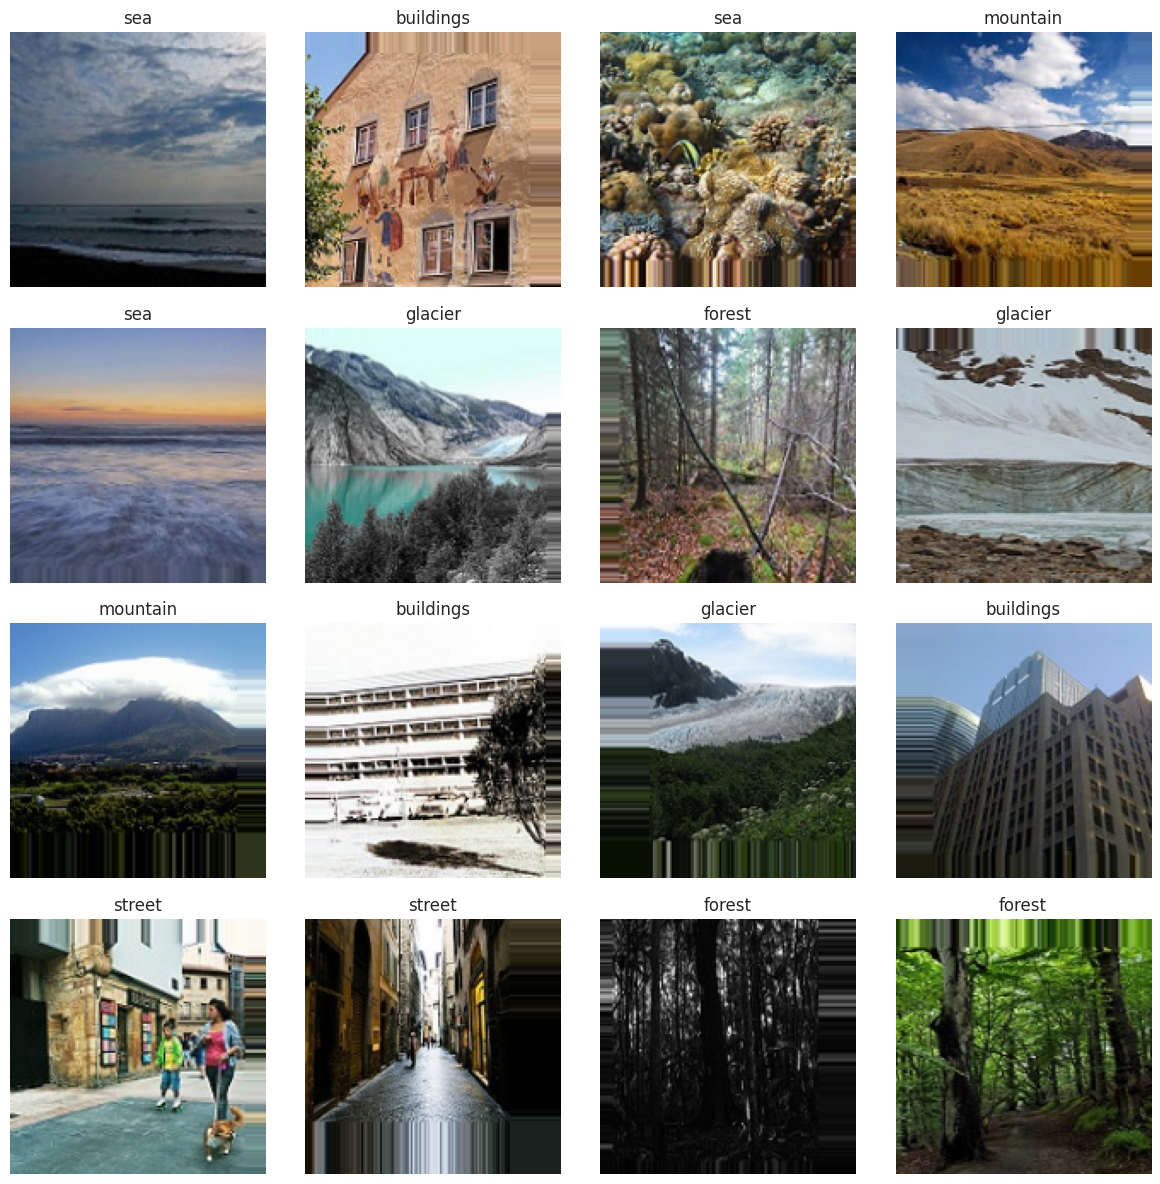

In [ ]:
# Create subplots with 4 rows and 4 columns
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))

# Initialize index counter
idx = 0

# Loop through each row
for i in range(4):
    # Loop through each column
    for j in range(4):
        # Get the label corresponding to the current image
        label = labels[np.argmax(train_generator[0][1][idx])]

        # Set the title of the subplot to the label
        ax[i, j].set_title(f"{label}")

        # Display the image in the subplot
        ax[i, j].imshow(train_generator[0][0][idx][:, :, :])

        # Turn off axis labels
        ax[i, j].axis("off")

        # Increment index counter
        idx += 1

# Adjust layout to prevent overlap of subplots
plt.tight_layout()

# Show the plot
plt.show()

________

# Building The Scratch Model


In [ ]:
# Define the model
Model = keras.models.Sequential([
    # First convolutional layer with 32 filters, kernel size of 3x3, and ReLU activation
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)),
    # Max pooling layer with pool size of 2x2
    MaxPool2D(2, 2),
    # Second convolutional layer with 64 filters, kernel size of 3x3, and ReLU activation
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    # Max pooling layer with pool size of 2x2
    MaxPool2D(2, 2),
    # Third convolutional layer with 128 filters, kernel size of 3x3, and ReLU activation
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    # Max pooling layer with pool size of 2x2
    MaxPool2D(2, 2),
    # Flatten layer to convert 2D feature maps into a 1D feature vector
    Flatten(),
    # Fully connected layer with 1024 neurons and ReLU activation
    Dense(1024, activation='relu'),
    # Dropout layer with dropout rate of 0.5 to prevent overfitting
    Dropout(0.5),
    # Output layer with 6 neurons for classification (assuming 6 classes) and softmax activation
    Dense(6, activation='softmax')
])


# Compiling the Model

In [ ]:
# now to compile the model, using adam optimizer and categorical crossentropy loss
Model.compile(optimizer ='adam',loss='categorical_crossentropy',metrics=['accuracy'])

 # Initializing the learning rate, early stopping, and other parameters.

In [ ]:
# Learning rate reduction callback
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_accuracy',  # Monitor validation accuracy
    patience=4,  # Number of epochs with no improvement after which learning rate will be reduced
    verbose=1,  # Verbosity mode
    factor=0.3,  # Factor by which the learning rate will be reduced
    min_lr=0.000001  # Lower bound on the learning rate
)

# Early stopping callback
early_stopping = EarlyStopping(
    monitor="val_accuracy",  # Monitor validation accuracy
    patience=7,  # Number of epochs with no improvement after which training will be stopped
    verbose=1,  # Verbosity mode
    mode="max",  # Monitoring mode
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

In [ ]:
#print model
print(Model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

# Training the Model ,  using 20 epochs

In [ ]:


epochs = 20  # Number of epochs
batch_size = 64  # Batch size

# Train the model using the fit method
history = Model.fit(
    train_generator,  # Training data generator
    validation_data=val_generator,  # Validation data generator
    epochs=epochs,  # Number of epochs
    batch_size=batch_size,  # Batch size
    verbose=2,  # Verbosity level (0: silent, 1: progress bar, 2: one line per epoch)
    callbacks=[learning_rate_reduction, early_stopping]  # Callbacks for learning rate reduction and early stopping
)


Epoch 1/20
88/88 - 787s - loss: 1.1995 - accuracy: 0.5389 - val_loss: 0.9276 - val_accuracy: 0.6476 - lr: 0.0010 - 787s/epoch - 9s/step
Epoch 2/20
88/88 - 791s - loss: 0.8533 - accuracy: 0.6786 - val_loss: 0.7608 - val_accuracy: 0.7097 - lr: 0.0010 - 791s/epoch - 9s/step
Epoch 3/20
88/88 - 786s - loss: 0.7495 - accuracy: 0.7198 - val_loss: 0.6663 - val_accuracy: 0.7589 - lr: 0.0010 - 786s/epoch - 9s/step
Epoch 4/20
88/88 - 777s - loss: 0.6669 - accuracy: 0.7566 - val_loss: 0.6233 - val_accuracy: 0.7782 - lr: 0.0010 - 777s/epoch - 9s/step
Epoch 5/20
88/88 - 777s - loss: 0.6134 - accuracy: 0.7784 - val_loss: 0.5736 - val_accuracy: 0.7992 - lr: 0.0010 - 777s/epoch - 9s/step
Epoch 6/20
88/88 - 803s - loss: 0.5767 - accuracy: 0.7927 - val_loss: 0.5294 - val_accuracy: 0.8138 - lr: 0.0010 - 803s/epoch - 9s/step
Epoch 7/20


# Plotting the Traing accuracy, Loss, Validation accuracy , Val_loss

In [ ]:
# Extract training and validation metrics from the history object
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

# Find the epoch with the lowest validation loss and highest validation accuracy
index_loss = np.argmin(val_loss)
index_acc = np.argmax(val_acc)
val_lowest = val_loss[index_loss]
val_highest = val_acc[index_acc]

# Generate epochs
epochs = [i+1 for i in range(len(train_acc))]

# Define labels for best epochs
loss_label = f'Best Epoch = {str(index_loss + 1)}'
acc_label = f'Best Epoch = {str(index_acc + 1)}'

# Plot training and validation loss
plt.figure(figsize=(20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'r--', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='orange', label=loss_label)
plt.title('Training Vs Validation (Loss) in base model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'g--', label='Validation Accuracy')
plt.scatter(index_acc + 1, val_highest, s=150, c='orange', label=acc_label)
plt.title('Training Vs Validation (Accuracy) in base model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# Model Evaluation

In [ ]:
# Evaluate the model on the training dataset
train_score = Model.evaluate(train_generator, steps=32, verbose=1)
# Evaluate the model on the validation dataset
valid_score = Model.evaluate(val_generator, steps=32, verbose=1)
# Evaluate the model on the test dataset
test_score = Model.evaluate(test_generator, steps=32, verbose=1)

# Print the evaluation results
print("Train Loss:", train_score[0])
print("Train Accuracy:", train_score[1])
print('-' * 20)
print("Validation Loss:", valid_score[0])
print("Validation Accuracy:", valid_score[1])
print('-' * 20)
print("Test Loss:", test_score[0])
print("Test Accuracy:", test_score[1])

# Predictions

In [ ]:
# Generate predictions using the model on the test dataset
preds = Model.predict_generator(test_generator)

# Get the predicted class labels by taking the index of the maximum probability for each prediction
y_pred = np.argmax(preds, axis=1)

# Get the class indices dictionary from the test generator
g_dict = test_generator.class_indices

# Extract the class labels from the dictionary
classes = list(g_dict.keys())



# Confusion Matrix

In [ ]:
# Import confusion_matrix and itertools
from sklearn.metrics import confusion_matrix
import itertools

# Compute confusion matrix
cm = confusion_matrix(test_generator.classes, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Define tick marks
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Set threshold for text color
thresh = cm.max() / 2.

# Add text annotations
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()


# Using VGG16 as a Pre-trained Model

In [ ]:
# Let's visualize the model
import visualkeras
visualkeras.layered_view(base_model,legend=True)

### VGG16 Model

In [ ]:
from keras.layers import Dense, GlobalAveragePooling2D
from keras.applications import VGG16
import keras

num_classes = 6  # Number of classes in your dataset
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom top layers for your specific task
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)  # Add a dense layer with 1024 neurons and ReLU activation
predictions = Dense(num_classes, activation='softmax')(x)  # Output layer with softmax activation for classification

# Define the model
model = keras.models.Model(inputs=base_model.input, outputs=predictions)

# Freeze all layers in the base model
for layer in base_model.layers:
    layer.trainable = False


In [ ]:
from keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0002),  # Use Adam optimizer with learning rate 0.0002
              loss='categorical_crossentropy',  # Use categorical crossentropy loss function
              metrics=['accuracy'])  # Evaluate model performance using accuracy metric

# Print model summary
model.summary()


# Initializing the learning rate, early stopping, and other parameters.

In [ ]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Learning rate reduction callback
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_accuracy',  # Monitor validation accuracy
    patience=4,  # Number of epochs with no improvement after which learning rate will be reduced
    verbose=1,  # Verbosity mode
    factor=0.4,  # Factor by which the learning rate will be reduced
    min_lr=0.00003  # Lower bound on the learning rate
)

# Early stopping callback
early_stopping = EarlyStopping(
    monitor="val_accuracy",  # Monitor validation accuracy
    patience=7,  # Number of epochs with no improvement after which training will be stopped
    verbose=1,  # Verbosity mode
    mode="max",  # Monitoring mode
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)


In [ ]:
history_frozen = model.fit(
    train_generator,  # Training data generator
    steps_per_epoch=11230 // 128,  # Number of training steps per epoch
    epochs=25,  # Number of epochs
    validation_data=val_generator,  # Validation data generator
    validation_steps=2804 // 128,  # Number of validation steps per epoch
    callbacks=[learning_rate_reduction, early_stopping],  # Callbacks for learning rate reduction and early stopping
    verbose=2  # Verbosity level (0: silent, 1: progress bar, 2: one line per epoch)
)


# Hypertuning - Freezing , Unfreezing Layers

In [ ]:
# Unfreeze some layers in the base model for fine-tuning
for layer in model.layers[:11]:
    layer.trainable = False  # Freeze the first 11 layers
for layer in model.layers[11:]:
    layer.trainable = True  # Unfreeze the subsequent layers

In [ ]:
model.summary()

## Recompiling the model After Hypertuning

In [ ]:
# Recompile the model with new optimizer settings
model.compile(optimizer=Adam(learning_rate=0.0001),  # Use Adam optimizer with learning rate 0.0001
              loss='categorical_crossentropy',  # Use categorical crossentropy loss function
              metrics=['accuracy'])  # Evaluate model performance using accuracy metric

# Train the model with fine-tuning
history_fine_tuned = model.fit(
    train_generator,  # Training data generator
    steps_per_epoch=11230 // 128,  # Number of training steps per epoch
    epochs=20,  # Number of epochs
    validation_data=val_generator,  # Validation data generator
    validation_steps=2804 // 128,  # Number of validation steps per epoch
    callbacks=[learning_rate_reduction, early_stopping],  # Callbacks for learning rate reduction and early stopping
    verbose=2  # Verbosity level (0: silent, 1: progress bar, 2: one line per epoch)
)

## Plotting the Traing accuracy, Loss, Validation accuracy , Val_loss¶

In [ ]:
train_acc = history_frozen.history['accuracy']
train_loss = history_frozen.history['loss']

val_acc = history_frozen.history['val_accuracy']
val_loss = history_frozen.history['val_loss']

index_loss = np.argmin(val_loss)
index_acc = np.argmax(val_acc)
val_lowest = val_loss[index_loss]
val_highest = val_acc[index_acc]

epochs = [i+1 for i in range(len(train_acc))]
loss_label = f'Best Epoch = {str(index_loss + 1)}'
acc_loss = f'Best Epoch = {str(index_acc +1)}'

# Training and Validation Loss
plt.figure(figsize=(20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'r--', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='orange', label=loss_label)
plt.title('Training Vs Validation (Loss) in VGG model after freezing initial layers')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'g--', label='Validation Accuracy')
plt.scatter(index_acc + 1, val_highest, s=150, c='orange', label=acc_loss)
plt.title('Training Vs Validation (Accuracy) in VGG model after freezing initial layers')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
train_acc = history_fine_tuned.history['accuracy']
train_loss = history_fine_tuned.history['loss']

val_acc = history_fine_tuned.history['val_accuracy']
val_loss = history_fine_tuned.history['val_loss']

index_loss = np.argmin(val_loss)
index_acc = np.argmax(val_acc)
val_lowest = val_loss[index_loss]
val_highest = val_acc[index_acc]

epochs = [i+1 for i in range(len(train_acc))]
loss_label = f'Best Epoch = {str(index_loss + 1)}'
acc_loss = f'Best Epoch = {str(index_acc +1)}'

# Training and Validation Loss
plt.figure(figsize=(20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'r--', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='orange', label=loss_label)
plt.title('Training Vs Validation (Loss) in VGG model after unfreezing layers')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'g--', label='Validation Accuracy')
plt.scatter(index_acc + 1, val_highest, s=150, c='orange', label=acc_loss)
plt.title('Training Vs Validation (Accuracy) in VGG model after unfreezing layers')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# Evaluate the fine-tuned model on the test dataset
ModelLoss, ModelAccuracy = model.evaluate(test_generator)

# Print the test loss and accuracy
print('Test Loss is {:.4f}'.format(ModelLoss))
print('Test Accuracy is {:.2%}'.format(ModelAccuracy))

# Saving the model

In [ ]:
# Save the model to the specified path
model.save("/content/drive/MyDrive/model_VGG16.h5", include_optimizer=True)

#  Predictions

In [ ]:
# Generate predictions using the model on the test dataset
predictions = model.predict(test_generator)

In [ ]:
# Retrieve true class labels from the test dataset
y_test = test_generator.classes

# Convert predicted probabilities into class labels
y_pred = np.argmax(predictions, axis=1)

# Classification Report

In [ ]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=values)

# Print the classification report
print(report)

# Confusion Matrix

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Set a different color palette and style
sns.set_palette("viridis")
sns.set_style("whitegrid")

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix,
            annot=True,  # Annotate each cell with the numeric value
            fmt='.3g',  # Format the annotation as a float with three decimal places
            xticklabels=values,  # Set the x-axis labels to the class labels
            yticklabels=values,  # Set the y-axis labels to the class labels
            cmap='viridis')  # Use the 'viridis' color palette

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Display the heatmap
plt.show()


# Loading the VGG16 model

In [ ]:

# Load the VGG16 model from the saved HDF5 file
final_VGG16_model = tf.keras.models.load_model('/content/drive/MyDrive/model_VGG16.h5')

In [ ]:
final_VGG16_model.summary()

# Predicting the class

In [ ]:
# Load and preprocess the image for prediction
img = cv2.imread('/content/drive/MyDrive/Archive/seg_train/seg_train/buildings/10151.jpg')
img = cv2.resize(img, (224, 224))
img = np.reshape(img, [1, 224, 224, 3])
img = img / 255  # Normalize pixel values

# Predict class probabilities using the VGG16 model
preds = final_VGG16_model.predict(img)

# Get the index of the class with the highest probability
max_idx = np.argmax(preds)

# Map the index to the corresponding class label using the training generator's class indices
class_indices = {v: k for k, v in train_generator.class_indices.items()}
predicted_class = class_indices[max_idx]

# Print the predicted class label
print("Predicted class:", predicted_class)


In [ ]:
import cv2
import numpy as np

# Load and preprocess the image for prediction
img = cv2.imread('/content/drive/MyDrive/Archive/seg_train/seg_train/glacier/10025.jpg')
img = cv2.resize(img, (224, 224))
img = np.reshape(img, [1, 224, 224, 3])
img = img / 255  # Normalize pixel values

# Predict class probabilities using the VGG16 model
preds = final_VGG16_model.predict(img)

# Get the index of the class with the highest probability
max_idx = np.argmax(preds)

# Map the index to the corresponding class label using the training generator's class indices
class_indices = {v: k for k, v in train_generator.class_indices.items()}
predicted_class = class_indices[max_idx]

# Print the predicted class label
print("Predicted class:", predicted_class)
